### Can We Track Pro-Ukrainian Sentiment Through Tweets?

**Michelle Kearney**

### Executive Summary

On February 24, 2022, Russian invaded Ukraine. Ukraine is completely dependent on foreign assistance for humanitarian, financial and military needs. Continued foreign aid is related to public support for their efforts in the war. Social media provides open source data on public opinion. This project explores the potential of using tweets to track public sentiment. A dataset provided by Daria Purtova on Kaggle was used for this project. It included tweets compiled between January 1, 2022 through March 6, 2022 that included one of eight search phrases related to the Russian-Ukrainian war. Tweets were classified by sentiment as either Pro-Ukraine or other using the TextBlob library. Once texts were classified, classification models using logistic regression, k-nearest neighbors and decision trees were compared to build an optimum model to classify text. Based on a sample of 100 tweets, the sentiment analysis was correct in 72% of the cases. The K-nearest neighbors model performed slight better than the other two models, but none of the models improved on the baseline model for predicting the test set. Features that the models identified as the most correlated with sentiment were the search phrase, especially 'Ukraine War', dates, the app TweetDeck, retweet counts and like counts. 

### Rationale

On February 24, 2022, Russia invaded Ukraine. This led to the largest refugee and humanitarian crisis within Europe since the Yugoslav Wars in the 1990s. According to a report by the [Council on Foreign Relations](https://www.cfr.org/article/how-much-aid-has-us-sent-ukraine-here-are-six-charts), forty-seven countries have provided military aid to Ukraine. The U.S. alone has directed more than \\$75 billion in assistance for humanitarian, financial, and military support. Ukraine expects a \\$38 billion budget deficit this year and the Ukrainian government is requesting an additional \$14 billion in foreign aid for rapid reconstruction of critical infrastructure [(Reuters).](https://www.reuters.com/world/europe/ukraine-says-its-received-167-bln-foreign-aid-this-year-2023-05-11/). Continued foreign aid is heavily dependent on public support for Ukraine. 

### Research Question

Social media provides a plethora of open source data on public opinion. The goal of this project is to determine if we can track public support for Ukraine through tweets.

### Data Sources

The dataset used for this project comes from Daria Purtova on [Kaggle.](https://www.kaggle.com/datasets/foklacu/ukraine-war-tweets-dataset-65-days) Purtova compiled tweets between January 1, 2022 to March 6, 2022. She searched on the following phrases and compiled results into 8 separate CSV files based on the search phrases.

* ukraine war
* ukraine troops
* ukraine border
* ukraine NATO
* StandWithUkraine
* russian troops
* russian border ukraine
* russia invade

Each file consisted of 29 features. Some of the columns were identifiers, not unique, redundant or not populated enough to be useful. Eight of the features were useful for this study. They include the following:

* **Date** - the date the tweet was posted (object)
* **Content** - the text of the tweet (object)
* **replyCount** - the number of replies to the tweet (int64)
* **retweetCount** - the number of times the tweet was retweeted (int64)
* **likeCount** - the number of times the tweet was liked (int64)
* **quoteCount** - the number of times the tweet was quoted (int64)
* **SourceLabel** - the type of app from which the tweet was sent (e.g. iPhone, Android, Web app) (object)
* **Searh** - the search phrase used to compile the text

The language of the text was one of the features, but only English texts were used for this study. To save on computational time, 7000 tweets were randomnly selected from each of the 8 CSV files to make the final dataset of 56000 tweets. Content was used to classify the text by sentiment. Sentiment was used as the response variable. The other seven variables were evaluated as predictors. 

### Methodology

A binary classification will be created for each text as either pro-Ukraine or other.  Other could be Anti-Ukraine or neutral. The TextBlob library was used to assign a sentiment to each text following the method of [satyajit1910](https://www.geeksforgeeks.org/twitter-sentiment-analysis-on-russia-ukraine-war-using-python/). 

Once texts were assigned a sentiment, classification models such as logistic regression, K-nearest neighbors and decision trees were compared to determine if they could classify texts.

### Results

**Sentiment Analysis.** Figure 1 shows the results of the sentiment analysis using the TextBlob library. 31% of the tweets were classified as pro-Ukraine. 

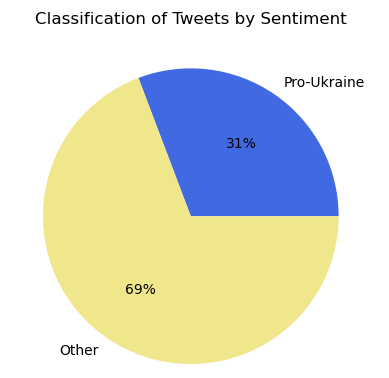

**Figure 1.** Classification of texts as Pro-Ukraine or other.

Figure 2 shows the breakdown of pro-Ukrainian Tweets by search phrase. Tweets with the phrase "StandWithUkraine" were more likely to be classified as pro-Ukrainian. Tweets with the phrase "UkraineWar", were the least likely to be classified as pro-Ukrainian.

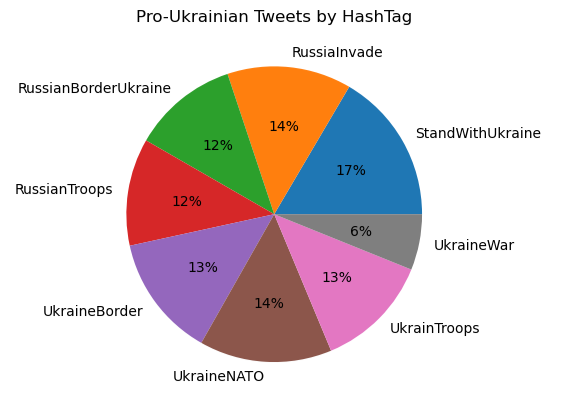

**Figure 2.** Breakdown of pro-Ukrainian tweets by hashtag.

To evaluate the accuracy of the sentiment analysis, I took a random sample of 100 tweets and manually classified them. I compared my classification to the sentiment analysis. I classified 24% as pro-Ukrainian. TextBlob classified more as pro-Ukrainian. Comparing my results to Textblob, we agreed 72% of the time. The estimated accuracy of the sentiment analysis is approximately 72%. 

**Exploratory Data Analysis.** The relationship between sentiment and the other variables was explored visually. Figures 3 and 4 show the relationship between sentiment and date of the tweet and between sentiment and the type of app used to send the tweet. The other variables did not show any differences between pro-Ukrainian sentiment and other sentiment. 

There does seem to be a change in sentiment right before the invasion and after the invasion (right-side of the bar graph). The overall number of tweets decreases dramatically, but also the ratio of pro-Ukrainian to other tweets is almost the same. There also seems to be variation in the proportion of sentiments depending on the type of app used to send the tweet. 

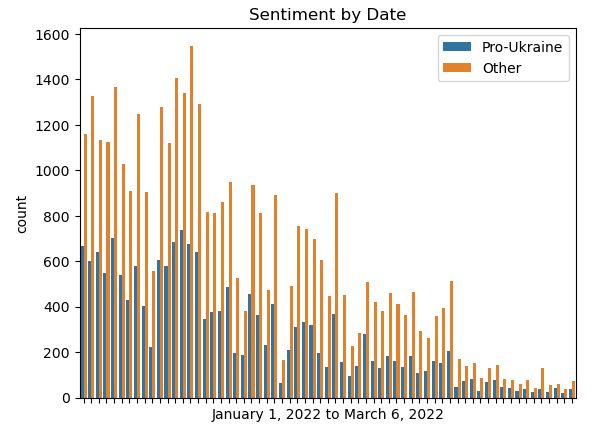

**Figure 3.** Comparison of sentiment by tweet date.

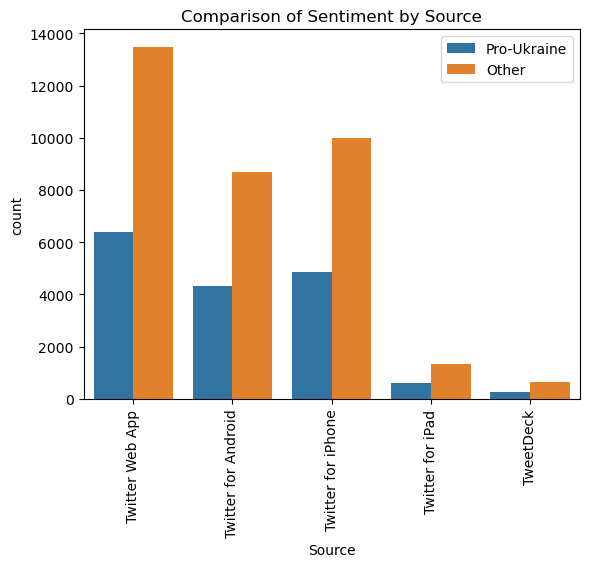

**Figure 4.** Comparison of sentiment by type of app used to sent the tweet.

**Models.** The data were split into a training and test set. Categorical variables were transformed using OneHotEncoder. Numeric variables were scaled using StandardScaler. The baseline model based on the test set has an accuracy of 68%. Models were built using logistic regression, k-nearest neighbors, and decision trees to classify the sentiment of each text. 

*Logistic Regression*

GridSearchCV was used to optimize the number of features to use for this model. The optimum number was 20. The training accuracy was 68% and the test accuracy was 68%, thus this model did not improve on the baseline model. However, I was able to identify the relative importance of various features based on which features were selected for the model and based on the magnitudes of their coefficients. 

Table 1 shows the features selected and their coefficients. Various dates make up the majority of the most relevant features. This is consistent with the exploratory data analysis which showed variations in sentiment by date. However, the dates are primarily early on in the dataset. The latest data occurs on February 15, 2022. Tweets occurring right before or after the invasion are less likely to be correlated with sentiment.  

The search phrase 'Ukraine War' had the coefficient with the largest magnitude and was negatively correlated with pro-Ukrainian sentiment. This is consistent with the results shown in Figure 2. The search phrase 'Russian Troops' and 'Russian border Ukraine' were also negatively correlated with sentiment. Tweets originating from the TweetDeck were negatively correlated with pro-Ukrainian sentiment.

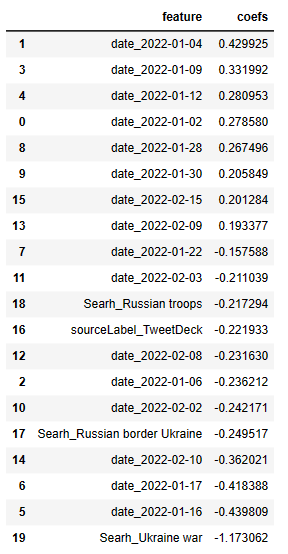

**Table 1.** Features selected in the logistic regression model and their coefficients.

*K-Nearest Neighbors*

GridSearchCV was used to optimize the number of nearest neighbors to use in the model. The optimum number was 6. The training accuracy was 72% and the test accuracy was 67%. Figure 5 shows the confusion matrix for the test set predictions. The precision is 39%, the recall is 11% but the specificity is 92%. The model does well identifying tweets that are not pro-Ukrainian. The model does a poor job identifying the pro-Ukrainian tweets.

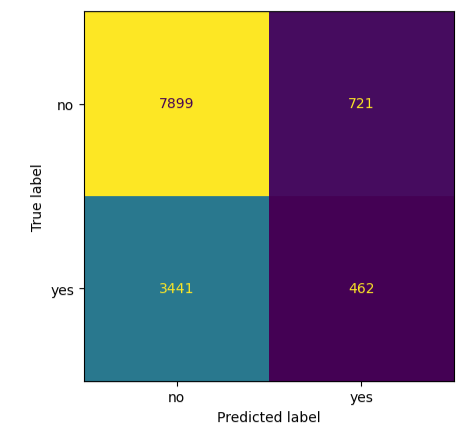

**Figure 5.** Confusion matrix for KNN test set predictions. 'Yes' is pro-Ukrainian sentiment and 'No' is other sentiment.

*Decision Tree*

GridSearchCV was used to optimize the max depth of the tree. The optimum depth was 3 layers. The training accuracy with this model was 68% and the test accuracy was 68%. This model did not improve upon the base model. However, we can use the model to identify which features are more relevant. 

The first decision split on the search phrase 'Ukraine War.' The second level decisions split on the search phrase 'Stand with Ukraine' and on retweet count. The third levels split on the search phrase 'Ukraine NATO', like count, the date 2022-02-22, and the date 2022-01-1=25.  

**Discussion.** A summary of the model results is shown in Table 2. The K-Nearest Neighbors model performed slightly better than the baseline model on the training set but slightly worse on the test set. The other two models performed as the baseline model would. The models were not effective at predicting sentiment. However, they were useful in identify relevant features. 

Logistic regression identified dates, especially dates prior to the invasion, as influencing sentiment. The decision tree specifically identified January 25 and February 22 as being correlated to sentiment. The search phrase 'Ukraine War' was negatively correlated with pro-Ukrainian sentiment, and identified by both the logistic regression model and the decision tree as the most influential feature. Logistic regression weighted the search phrases 'Russian Troops' and 'Russian border Ukraine.' The decision weighted the search phrase 'Ukraine NATO' and 'Stand with Ukraine.' Other features identified by the models were the use of the app TweetDeck, retweet counts and like counts.

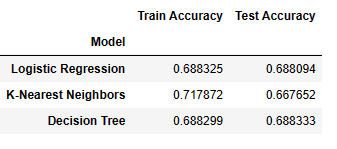

**Table 2.** Summary of model performance.

### Next Steps

A random sample of 100 texts was manually classified and compared to the sentiment classifications. For this sample, the sentiment analysis was 72% correct. This process could be refined, such as manually classifying a larger sample and using this to train TextBlob. The models were unsuccessful at prediction above the baseline model. Improving sentiment analysis would be more effective at tracking public support rather than developing prediction models.

### Outline of Project

An overview of the analysis can be found with the notebook [Ukraine Tweets Analysis](https://github.com/chellykearney/BerkeleyAI_ML_Capstone/blob/main/Ukraine%20Tweet%20Analysis.ipynb)

### Contact and Further Information

None at this time.